# Saturation Curves

* In this example plotting % of sequence file subsampled vs # of genes that had 10 or more reads
* other info I want is the total number of reads alinged to bacterial genome for each sample


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

data = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-02-12-data-normalization/data/2018-02-18-saturation_data-HM01HM03.csv"
data2 = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-02-12-data-normalization/data/2018-02-19-saturation_data-HM06HM07.csv"
data3 ="/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-02-12-data-normalization/data/2018-02-19-first-of-saturation-data.csv"
data4 = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-02-12-data-normalization/data/2018-02-19-last-of-saturation-data.csv"
total_reads_data = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/counts/flagstat/flagstat_summary.txt"

In [68]:
sc_df = pd.concat([pd.read_csv(f, index_col = 0) for f in [data, data2, data3, data4]], axis=1)
sc_df.index = [float(i.split("%")[0]) for i in list(sc_df.index)]
sc_df

,HM01_UR,HM01_UTI,HM03_UR,HM03_UTI,HM06_UR,HM06_UTI,HM07_UR,HM07_UTI,HM06_UTI_seq1,HM06_UTI_seq2,...,HM66_UR,HM66_UTI,HM86_UR,HM86_UTI,HM57_UTI_seq1,HM57_UTI_seq2,HM60_UTI_seq1,HM60_UTI_seq2,HM68_UTI_seq1,HM68_UTI_seq2
0.1,339.8,71.4,425.0,139.4,480.2,83.0,434.0,34.2,55.0,21.4,...,336.6,0.0,280.4,119.8,0.0,4.6,0.0,1.6,8.0,25.8
0.5,1497.2,304.4,1821.6,590.2,1833.4,395.8,1854.4,186.2,273.6,135.6,...,1337.2,0.0,1257.2,557.2,23.6,55.2,16.2,41.4,68.6,145.0
1.0,2334.8,574.0,2586.6,1016.6,2630.8,772.6,2679.4,355.4,532.4,261.0,...,2083.6,1.4,2000.6,969.8,54.0,108.0,45.4,80.6,131.4,282.8
10.0,4530.4,2311.6,4268.8,2727.0,4705.6,3044.4,4677.0,1968.2,2628.4,1837.8,...,4358.2,119.2,4356.6,3010.4,488.6,959.6,447.2,774.8,1059.6,1755.6
50.0,5184.6,3709.8,4642.6,3903.2,5392.0,4610.4,5220.0,3472.0,4257.6,3544.4,...,5087.2,694.8,5193.2,4399.8,1922.0,2997.8,1721.6,2684.6,2538.6,3277.0
75.0,5261.2,4064.4,4679.8,4125.0,5448.8,4890.0,5267.4,3838.2,4605.2,3944.6,...,5151.4,1100.4,5290.8,4665.6,2511.4,3589.6,2257.0,3422.2,2913.6,3632.8
100.0,5293.0,4270.0,4698.0,4269.0,5479.0,5084.0,5285.0,4065.0,4828.0,4246.0,...,5181.0,1535.0,5332.0,4835.0,2970.0,3947.0,2699.0,3971.0,3174.0,3869.0


In [69]:
def plotSampleSatCurve(strains):#ex. ["HM01", "HM03"]
    
    for strain in strains:
        cols_to_plot = [c for c in list(sc_df.columns) if strain in c]
        print(cols_to_plot)
        plt.figure()
        colors = ['-or', '-ob', '-og', '-oy']
        for cp, c  in zip(cols_to_plot, colors):
            plt.plot(sc_df[cp], c)#, sc_df[cols_to_plot[1]], '-or')
        plt.ylabel("# of genes with 10 or more reads")
        plt.xlabel ("% of reads subsampled")
        plt.legend(cols_to_plot)
        ax = plt.gca()
        ax.set_facecolor("0.97")
        plt.savefig("../data/{}_saturation_as_percentage.png".format(strain))
        

In [70]:
strains = ['HM01', 'HM03', 'HM06', 'HM07', 'HM14', 'HM17', 'HM43', 'HM54', 'HM56', 'HM57', 'HM60', 'HM66','HM68', 'HM86']


['HM01_UR', 'HM01_UTI']
['HM03_UR', 'HM03_UTI']
['HM06_UR', 'HM06_UTI', 'HM06_UTI_seq1', 'HM06_UTI_seq2']
['HM07_UR', 'HM07_UTI', 'HM07_UTI_seq1', 'HM07_UTI_seq2']
['HM14_UR', 'HM14_UTI']
['HM17_UR', 'HM17_UTI']
['HM43_UR', 'HM43_UTI', 'HM43_UTI_seq1', 'HM43_UTI_seq2']
['HM54_UR', 'HM54_UTI']
['HM56_UR', 'HM56_UTI']
['HM57_UR', 'HM57_UTI', 'HM57_UTI_seq1', 'HM57_UTI_seq2']
['HM60_UR', 'HM60_UTI', 'HM60_UTI_seq1', 'HM60_UTI_seq2']
['HM66_UR', 'HM66_UTI']
['HM68_UR', 'HM68_UTI', 'HM68_UTI_seq1', 'HM68_UTI_seq2']
['HM86_UR', 'HM86_UTI']


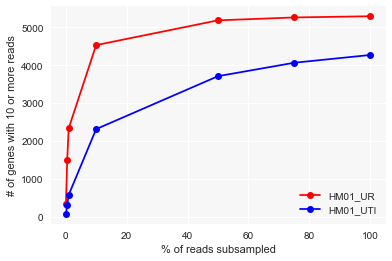

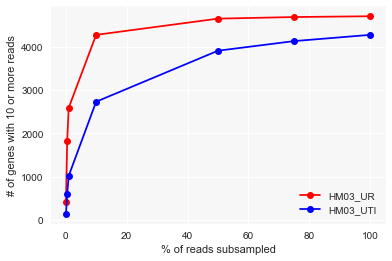

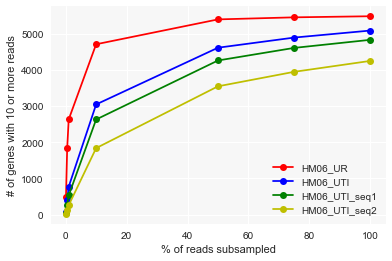

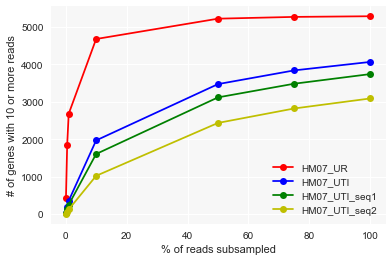

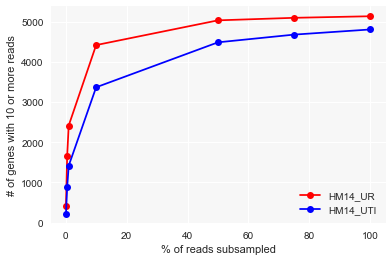

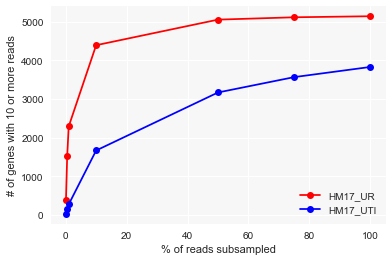

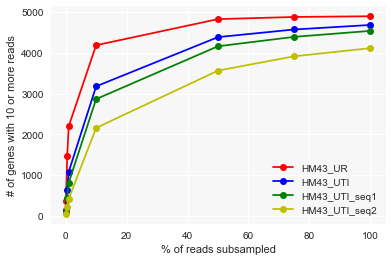

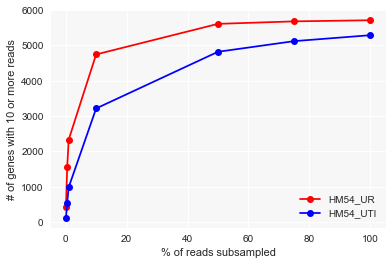

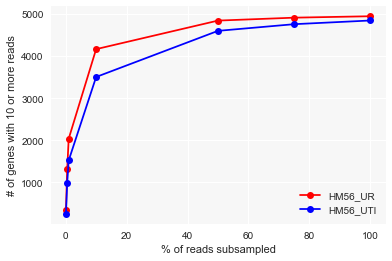

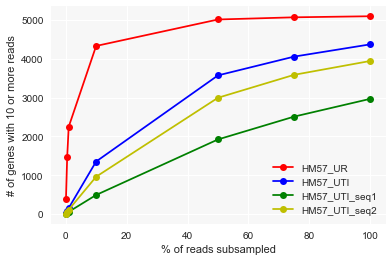

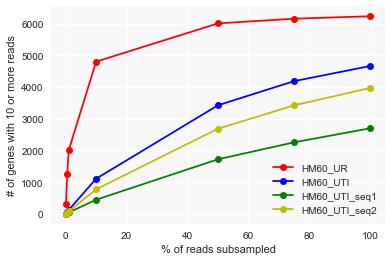

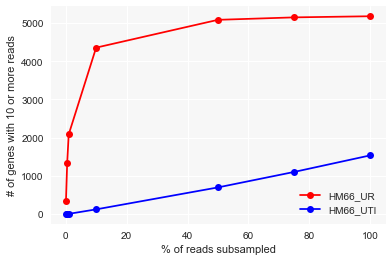

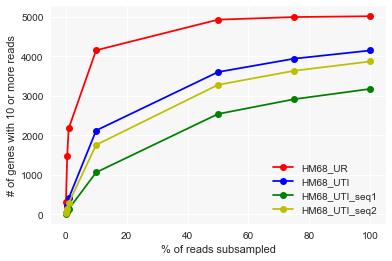

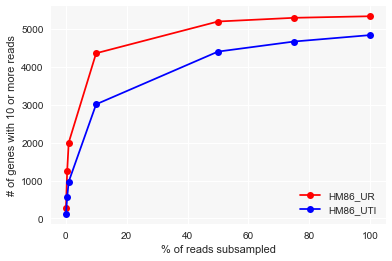

In [71]:
plotSampleSatCurve(strains)

* Now want to see if there's a relationship between how many reads aligned, and level at which samples plateau 

In [72]:
flagstat_df = pd.read_csv(total_reads_data, index_col=0)
flagstat_df.index = [i.split("_trimmed_")[0] for i in list(flagstat_df.index)]
flagstat_df['genes_covered'] = sc_df.T[100.0]

to_drop = [c for c in list(flagstat_df.index) if 'seq' in c]

flagstat_df = flagstat_df.drop(to_drop)


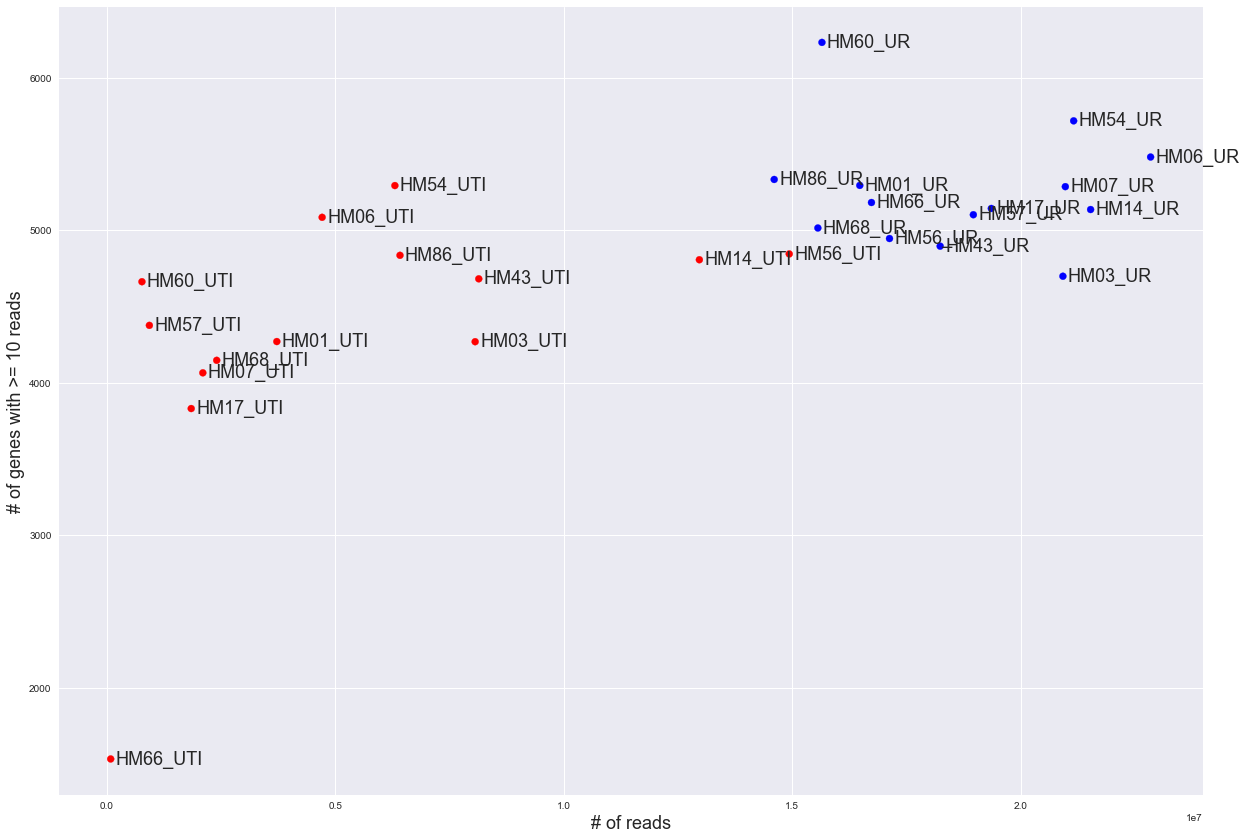

In [73]:
colors = ['blue' if "UR" in c else 'red' for c in list(flagstat_df.index)]
genes = flagstat_df.genes_covered
reads_mapped =  flagstat_df.mapped
f = plt.figure()
f.set_size_inches(20.5, 14.5)
plt.scatter(reads_mapped, genes, color=colors)
plt.xlabel("# of reads", fontsize = 18)
plt.ylabel ("# of genes with >= 10 reads", fontsize = 18)

for label,  reads_mapped, genes in zip(list(flagstat_df.index), flagstat_df.mapped, flagstat_df.genes_covered ):
    plt.annotate(label,
    xy=( reads_mapped, genes), 
    xytext=(5, -5), # but slightly offset
    textcoords='offset points', fontsize = 18)
    
plt.savefig("../data/depth_vs_gene_coverage.png")

In [91]:
import matplotlib.ticker as mtick
def plotSampleSatCurveMillionReads(strains, sc_df):   
    for strain in strains:
        cols_to_plot = [c for c in list(sc_df.columns) if strain in c]
        print(cols_to_plot)
        plt.figure()
        
        colors = ['-or', '-ob', '-og', '-oy']
        reads_mapped = [ flagstat_df.mapped[c] for c in cols_to_plot]
        for rm, cp, c in zip(reads_mapped, cols_to_plot, colors):
            #plt.ticklabel_format(style='sci', scilimits=(0,0))
            plt.plot(rm*(sc_df.index)/100, sc_df[cp], c)
    
        plt.ylabel("# of genes with 10 or more reads")
        plt.xlabel ("# of reads subsampled")
        plt.legend(cols_to_plot, loc=4)
        plt.locator_params(axis = 'x', nbins = 5)
        ax = plt.gca()
        
        ax.set_facecolor("0.97")
        ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
        
        plt.xlim(-1000000, 2.5*10**7)
        plt.savefig('../data/{}.png'.format(strain), dpi=1000)

In [85]:
sc_df_no_seq = sc_df.drop([c for c in sc_df.columns if 'seq' in c], axis = 1)


['HM01_UR', 'HM01_UTI']
['HM03_UR', 'HM03_UTI']
['HM06_UR', 'HM06_UTI']
['HM07_UR', 'HM07_UTI']
['HM14_UR', 'HM14_UTI']
['HM17_UR', 'HM17_UTI']
['HM43_UR', 'HM43_UTI']
['HM54_UR', 'HM54_UTI']
['HM56_UR', 'HM56_UTI']
['HM57_UR', 'HM57_UTI']
['HM60_UR', 'HM60_UTI']
['HM66_UR', 'HM66_UTI']
['HM68_UR', 'HM68_UTI']
['HM86_UR', 'HM86_UTI']


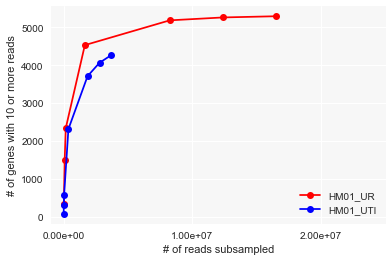

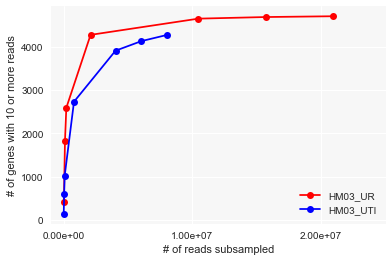

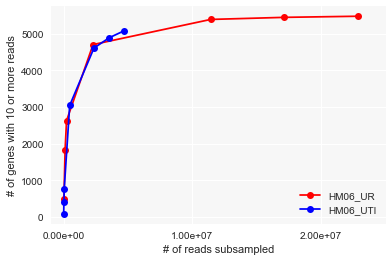

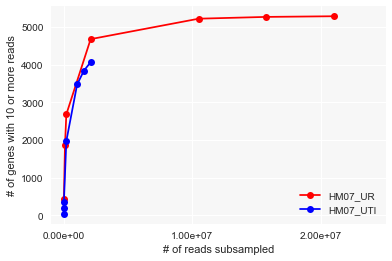

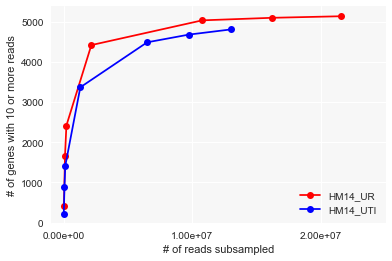

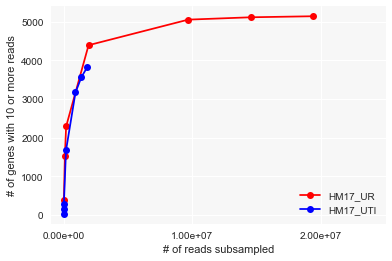

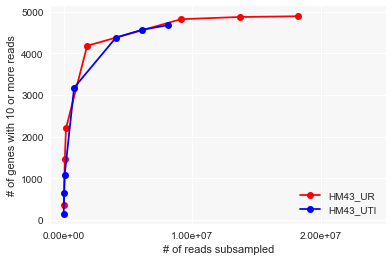

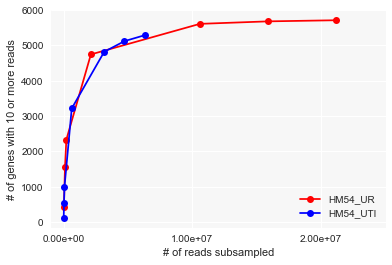

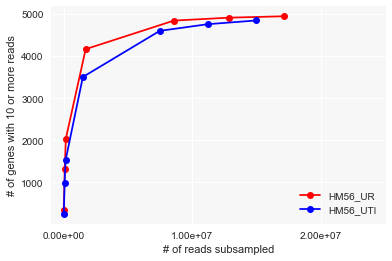

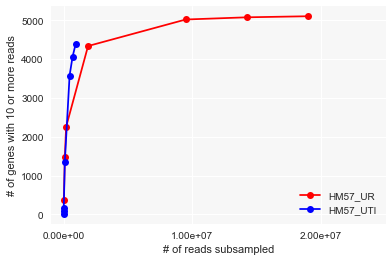

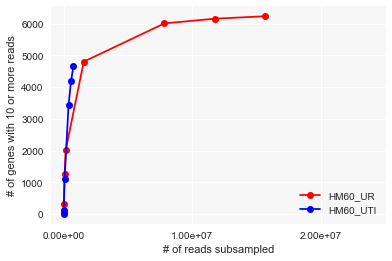

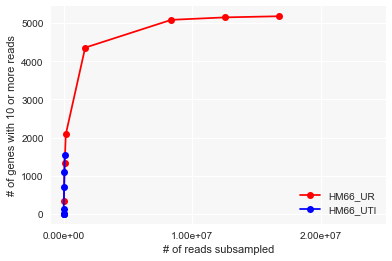

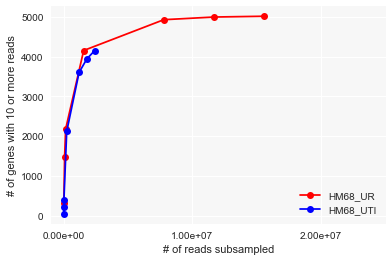

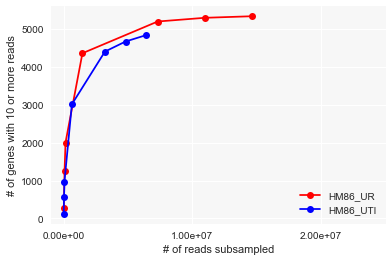

In [92]:
plotSampleSatCurveMillionReads(strains, sc_df_no_seq)

In [36]:
strains = ['HM01']

['HM01_UR', 'HM01_UTI']


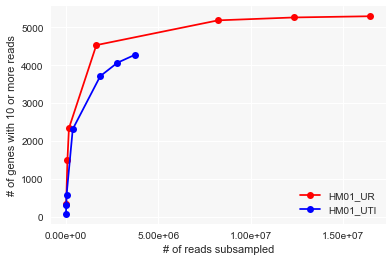

In [57]:
plotSampleSatCurveMillionReads(strains, sc_df_no_seq)

In [62]:
2.5*10^7

TypeError: unsupported operand type(s) for ^: 'float' and 'int'